In [76]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df = pd.read_excel(f'./230814_v2.xlsx')
#기존 데이터와 합치고 훈련데이터 등 분리
X = df.iloc[:,0:40]
y = df.iloc[:,40]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [87]:
df.isnull().sum().sort_values(ascending = False).head(40)

1hr 강수량     0
자치구_구로구     0
자치구_노원구     0
자치구_도봉구     0
자치구_동대문구    0
자치구_동작구     0
자치구_마포구     0
자치구_서대문구    0
자치구_서초구     0
자치구_성동구     0
자치구_성북구     0
자치구_송파구     0
자치구_양천구     0
자치구_영등포구    0
자치구_용산구     0
자치구_은평구     0
자치구_종로구     0
자치구_중구      0
자치구_중랑구     0
자치구_금천구     0
자치구_광진구     0
일평균 강수량     0
자치구_관악구     0
경사          0
고도          0
불투수면        0
녹지          0
하천          0
복개하천        0
맨홀          0
빗물받이        0
빗물펌프        0
교통사고        0
Year        0
Month       0
Day         0
자치구_강남구     0
자치구_강동구     0
자치구_강북구     0
자치구_강서구     0
dtype: int64

In [78]:
#변수 간 상관관계
df_corr = df.corr()

In [88]:
df_corr_sort = df_corr.sort_values('피해', ascending = False)
df_corr_sort['피해'].head(30)

피해          1.000000
1hr 강수량     0.221230
Year        0.207582
일평균 강수량     0.206651
자치구_강남구     0.172606
빗물펌프        0.168636
자치구_광진구     0.149491
자치구_노원구     0.133600
자치구_성동구     0.078704
Month       0.069474
자치구_동작구     0.067147
하천          0.056977
교통사고        0.054735
불투수면        0.048052
자치구_성북구     0.035365
Day         0.019304
자치구_금천구     0.018029
맨홀          0.017147
녹지          0.011472
자치구_영등포구    0.010806
빗물받이        0.004557
자치구_도봉구    -0.000751
자치구_동대문구   -0.005085
자치구_구로구    -0.009419
자치구_강서구    -0.012308
자치구_마포구    -0.013753
경사         -0.014536
복개하천       -0.016954
자치구_서대문구   -0.031089
자치구_종로구    -0.033978
Name: 피해, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py

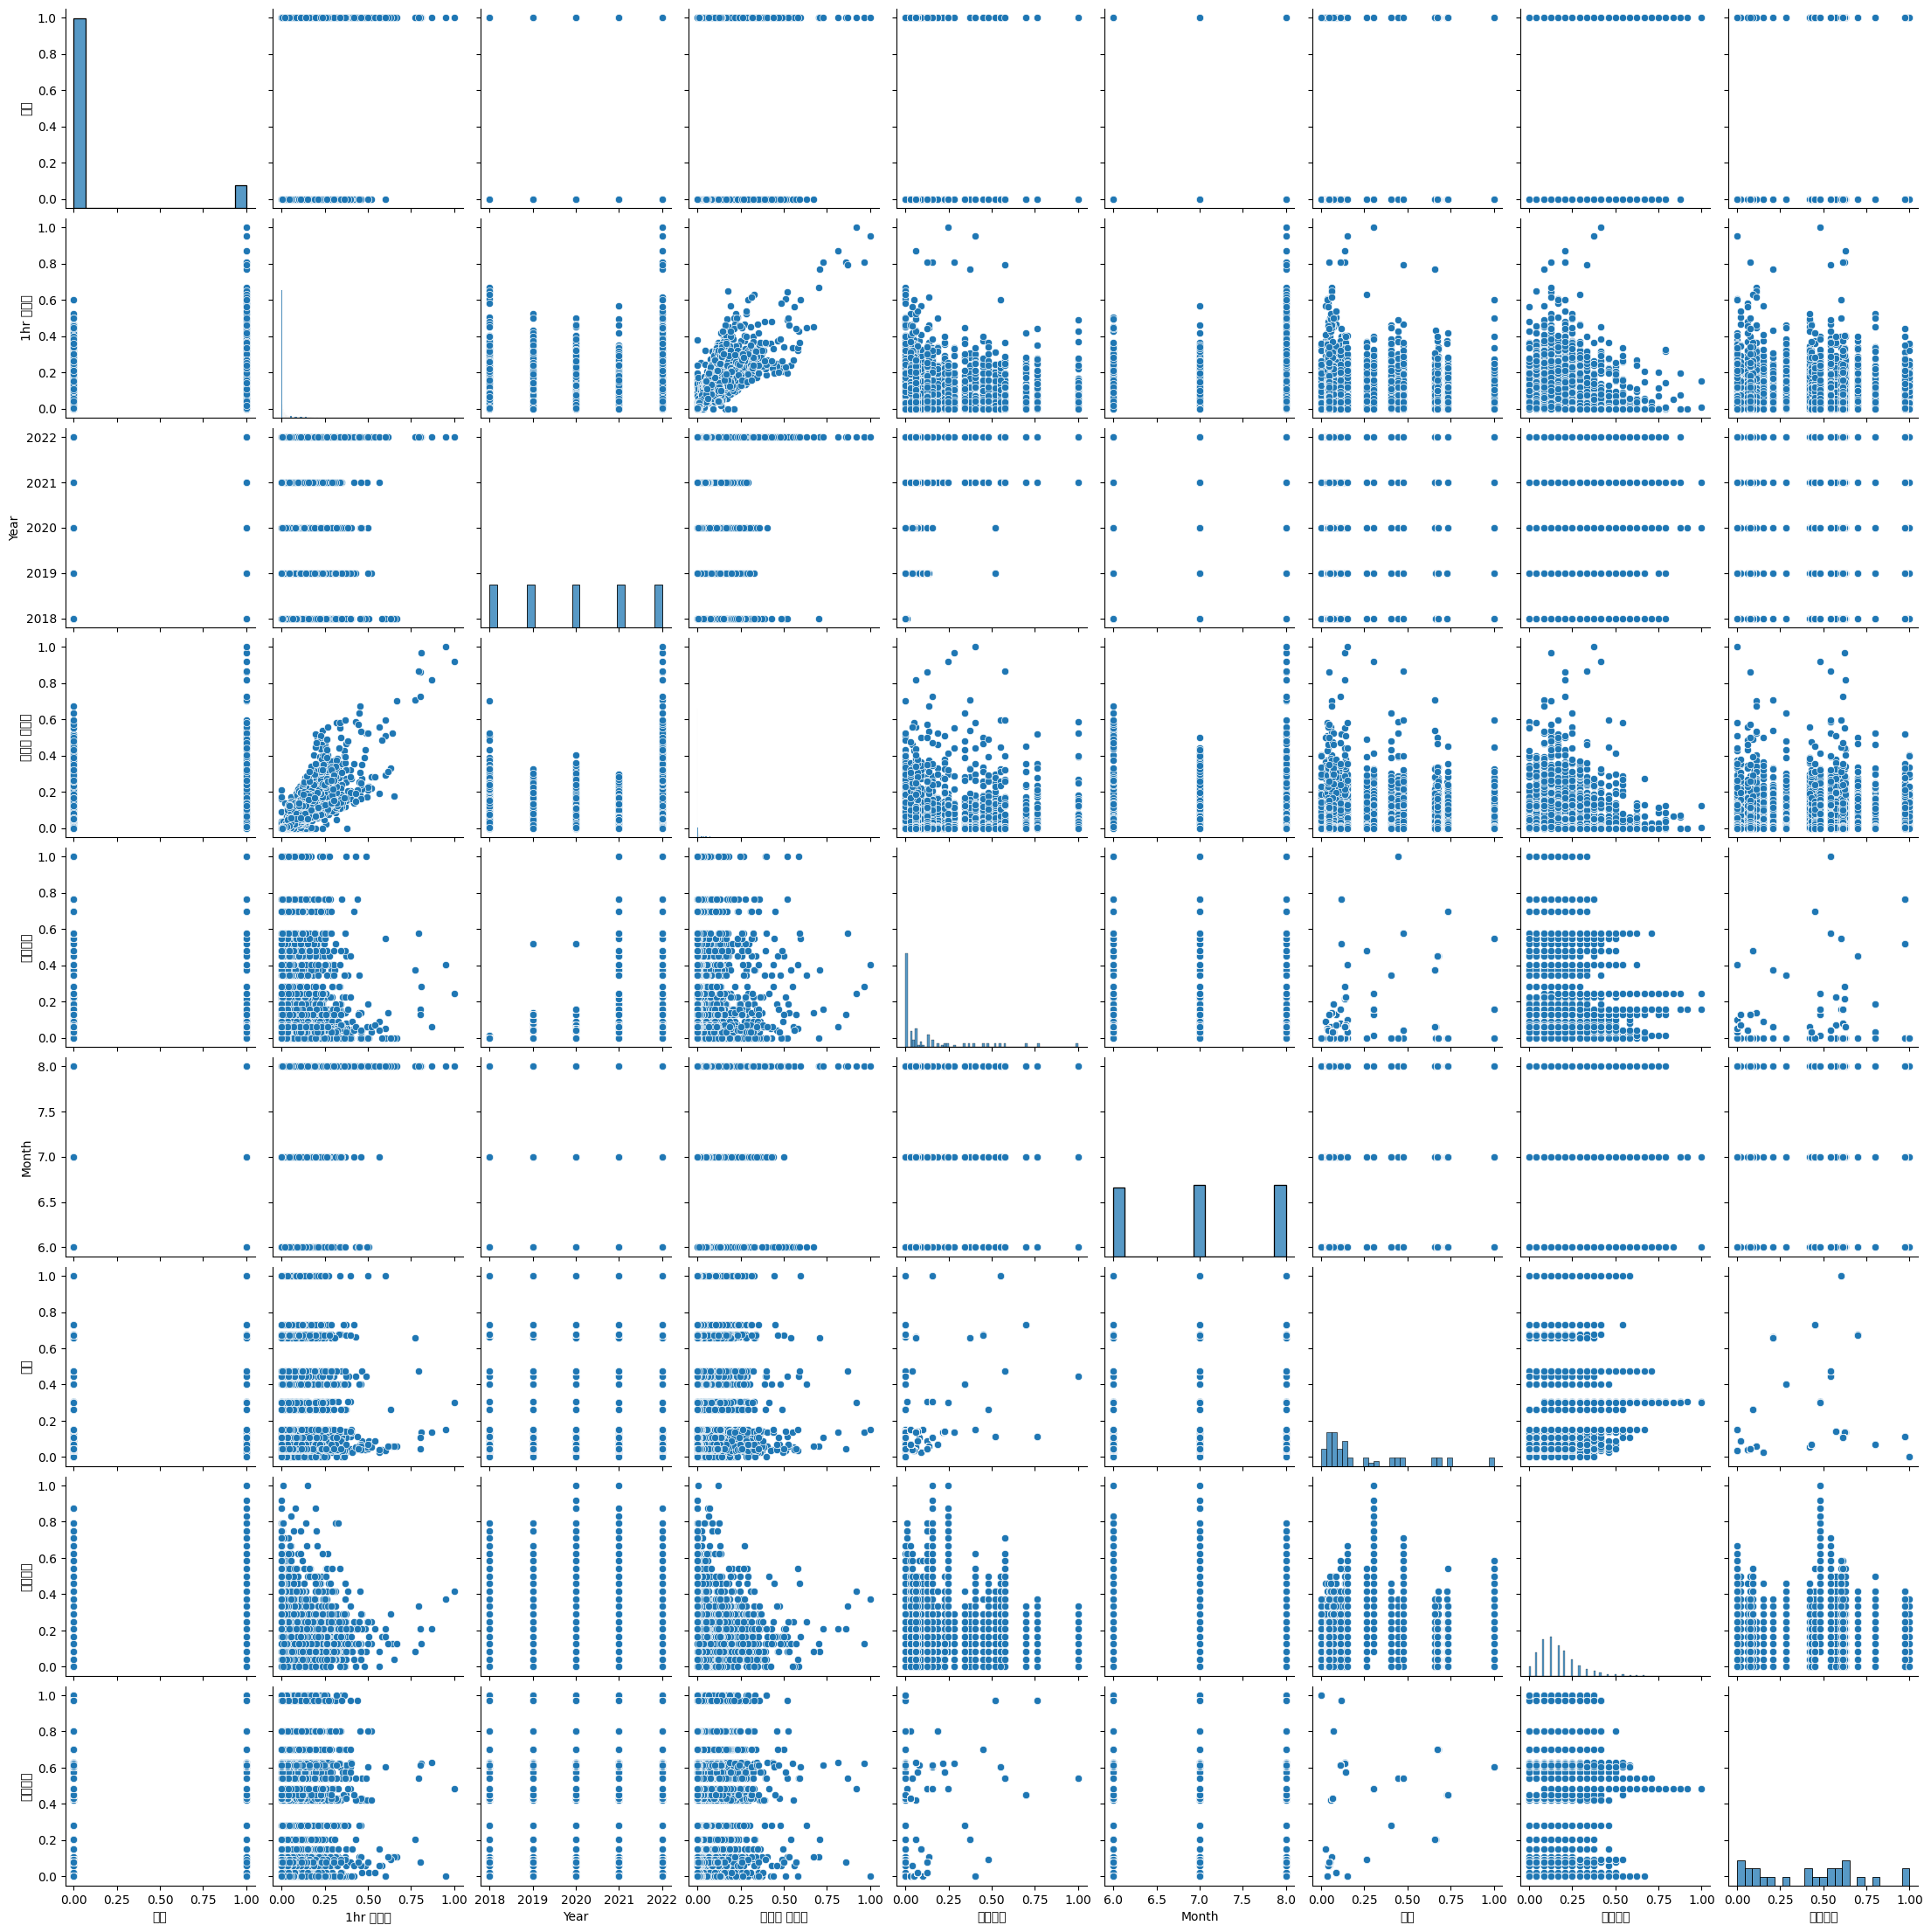

In [89]:
import seaborn as sns
#관련 없는 정도,
cols = ['피해','1hr 강수량','Year', '일평균 강수량','빗물펌프', 'Month', '하천', '교통사고', '불투수면']
sns.pairplot(df[cols])
plt.show()

In [85]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Malgun' in i.name:
        print(i.name, i.fname)

import platform
1
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    sns.set(font = 'Malgun Gothic', rc = {'font.family':font_name})
else:
    print('Unknown system... sorry')

Unknown system... sorry


In [90]:
#관련도 높은 변수만 모아서 모델 학습 시작
cols_train = ['1hr 강수량','Year', '일평균 강수량','빗물펌프', 'Month', '하천', '교통사고', '불투수면']
X_train_pre = df[cols_train]
y = df['피해'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)


In [91]:
#모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [93]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam', loss = 'mean_squared_error')
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

modelpath = "./flooding.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size =32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
216/216 [==============================] - 1s 3ms/step - loss: 0.1106 - val_loss: 0.1026
Epoch 2/2000
216/216 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 3/2000
216/216 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 4/2000
216/216 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 5/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 6/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 7/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 8/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 9/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.1026
Epoch 10/2000
216/216 [==============================] - 0s 1ms/step - loss: 0.109

In [39]:
#모델의 정확도는 89.9%정도됨
print('Accuracy: %.4f'%(model.evaluate(X,y)[1]))
print('loss: %.4f'%(model.evaluate(X,y)[0]))

360/360 [==============================] - 0s 835us/step - loss: 0.2719 - accuracy: 0.8882
Accuracy: 0.8882
360/360 [==============================] - 0s 858us/step - loss: 0.2719 - accuracy: 0.8882
loss: 0.2719


In [97]:
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(1000):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

72/72 [==============================] - 0s 1ms/step
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 1.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 1.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 1.00, 예측 침수: 0.00
실제 침수: 1.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.

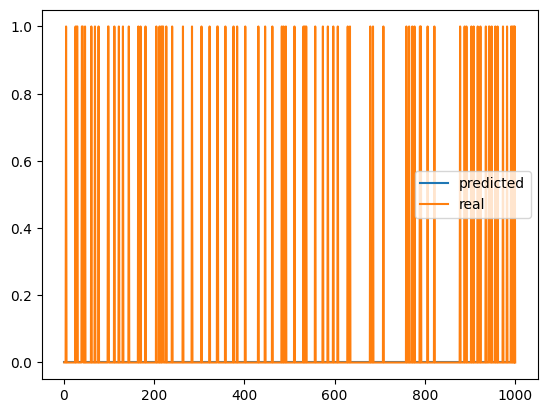

In [102]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()